In [29]:
import xgboost as xgb
import pprint as pp
from src.loadData import splitData, readCsvToDataframe, dateToFloat

data = readCsvToDataframe("../data/training_data_period_1.csv")
dateToFloat(data)


,electricLoad,startDate_year,startDate_month,startDate_day,startDate_hour,startDate_minute,startDate_second,endDate_year,endDate_month,endDate_day,endDate_hour,endDate_minute,endDate_second
0,91.73,2012,1,1,0,15,0,2012,1,1,0,30,0
1,92.78,2012,1,1,0,30,0,2012,1,1,0,45,0
2,91.43,2012,1,1,0,45,0,2012,1,1,1,0,0
3,91.57,2012,1,1,1,0,0,2012,1,1,1,15,0
4,92.67,2012,1,1,1,15,0,2012,1,1,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105210,88.57,2014,12,31,22,45,0,2014,12,31,23,0,0
105211,87.53,2014,12,31,23,0,0,2014,12,31,23,15,0
105212,88.08,2014,12,31,23,15,0,2014,12,31,23,30,0
105213,87.62,2014,12,31,23,30,0,2014,12,31,23,45,0


In [25]:
xTest, yTest , xTrain , yTrain = splitData(data,'electricLoad', 0.2 )


84172     378.20
84173     375.70
84174     373.56
84175     364.09
84176     373.27
           ...  
105210     88.57
105211     87.53
105212     88.08
105213     87.62
105214     88.45
Name: electricLoad, Length: 21043, dtype: float64

In [41]:
# define model
model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=10,
    learning_rate=0.01,
    colsample_bytree=1.0,
    min_child_weight=1
)

model.fit(xTrain, yTrain, verbose=False, eval_set= [(xTest, yTest)])

C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:359

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
predictedLabels = model.predict(xTest)

C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:359

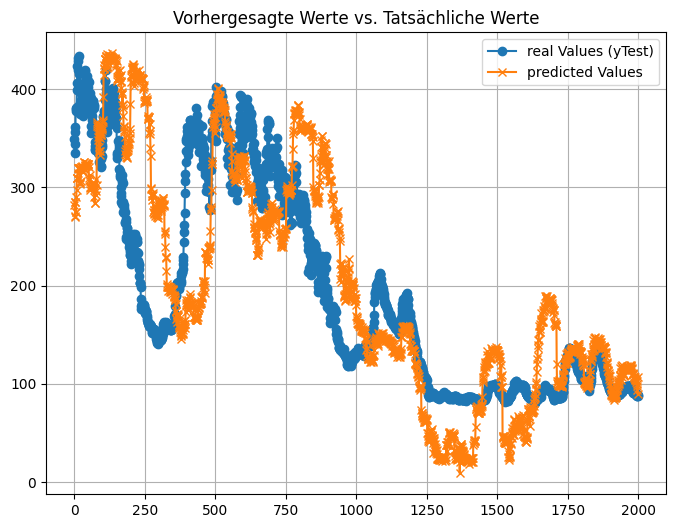

In [47]:
import matplotlib.pyplot as plt
import numpy as np




# Alternativ: Erstellen eines Liniendiagramms
plt.figure(figsize=(8, 6))
plt.plot(yTest.to_numpy()[-2000:], label='real Values (yTest)', marker='o')
plt.plot(predictedLabels[-2000:], label='predicted Values', marker='x')
plt.legend()
plt.title('Vorhergesagte Werte vs. Tatsächliche Werte')
plt.grid(True)
plt.show()
